# Unsupervised Machine Learning - Grid Square Selection
By: Jiahe Liu
20/01/2024

How many square is there in one grid?

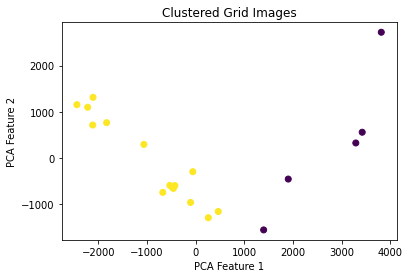

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from PIL import Image

# Load images
folder_path = '../data'
images = []
file_names = []
for file in os.listdir(folder_path):
    if file.endswith('.png') or file.endswith('.jpg'):
        img = Image.open(os.path.join(folder_path, file))
        img = img.resize((100, 100))  # Resize for consistency
        images.append(np.array(img))
        file_names.append(file)

# Preprocess images (flatten)
data = np.array([image.flatten() for image in images])

# Feature reduction (optional, using PCA for visualization)
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data)

# Clustering (example with KMeans)
kmeans = KMeans(n_clusters=2, n_init=10)
clusters = kmeans.fit_predict(data_reduced)

# Plotting the results
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Clustered Grid Images')
plt.show()


## PCA Interpretation
PCA analysis has resulted in well-separated clusters. This indicates that the feature space is distinct enough for the clustering algorithm to identify two groups within the dataset, which could correspond to "good" and "bad" grids as per the requirement.

## Mapping Back

Cluster 0:
 - GridSquare_20220302_210927.jpg
 - GridSquare_20220302_203255.jpg
 - GridSquare_20220302_204110.jpg
 - GridSquare_20220302_211837.jpg
 - GridSquare_20220302_205338.jpg


Cluster 1:
 - GridSquare_20220302_182142.jpg
 - GridSquare_20220302_211959.jpg
 - GridSquare_20220302_183607.jpg
 - GridSquare_20220302_190309.jpg
 - GridSquare_20220302_184208.jpg
 - GridSquare_20220302_194426.jpg
 - GridSquare_20220302_184002.jpg
 - GridSquare_20220302_204526.jpg
 - GridSquare_20220302_212545.jpg
 - GridSquare_20220302_205206.jpg
 - GridSquare_20220302_201211.jpg
 - GridSquare_20220302_210254.jpg
 - GridSquare_20220302_202651.jpg
 - GridSquare_20220302_181642.jpg
 - GridSquare_20220302_185621.jpg




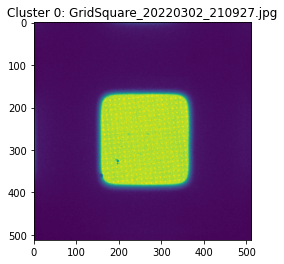

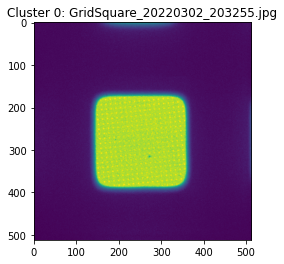

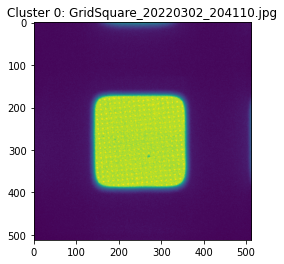

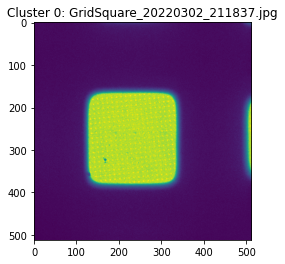

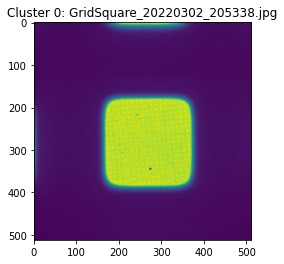

In [11]:

# Map clusters back to images
clustered_images = {i: [] for i in range(kmeans.n_clusters)}
for i, cluster in enumerate(clusters):
    clustered_images[cluster].append(file_names[i])

# Visualize the results (optional)
for cluster, image_files in clustered_images.items():
    print(f"Cluster {cluster}:")
    for file in image_files:
        print(f" - {file}")
    print("\n")


for i in range(min(5, len(clustered_images[0]))):  # Displaying first 5 images of cluster 0 as an example
    img_path = os.path.join(folder_path, clustered_images[0][i])
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Cluster 0: {clustered_images[0][i]}")
    plt.show()


## Clusrer 1

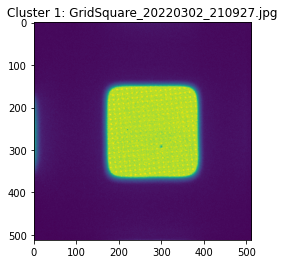

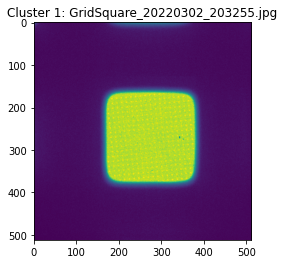

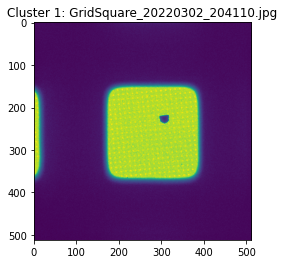

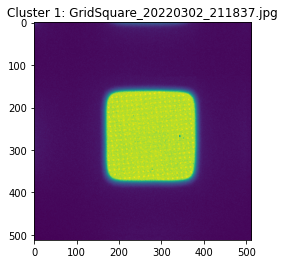

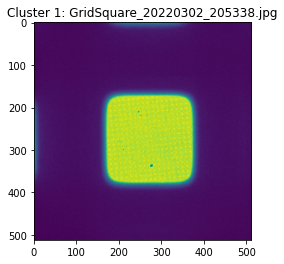

In [12]:
for i in range(min(5, len(clustered_images[0]))):  # Displaying first 5 images of cluster 1 as an example
    img_path = os.path.join(folder_path, clustered_images[1][i])
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Cluster 1: {clustered_images[0][i]}")
    plt.show()
